<a href="https://colab.research.google.com/github/Mennatullah61/DEPI-Final-Project/blob/Data-Preprocessing/RFM_CustomerAddress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rfm_add = pd.read_excel('/content/RFM Analysis.xlsx', sheet_name='CustomerAddress')

rfm_add

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [ ]:
rfm_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


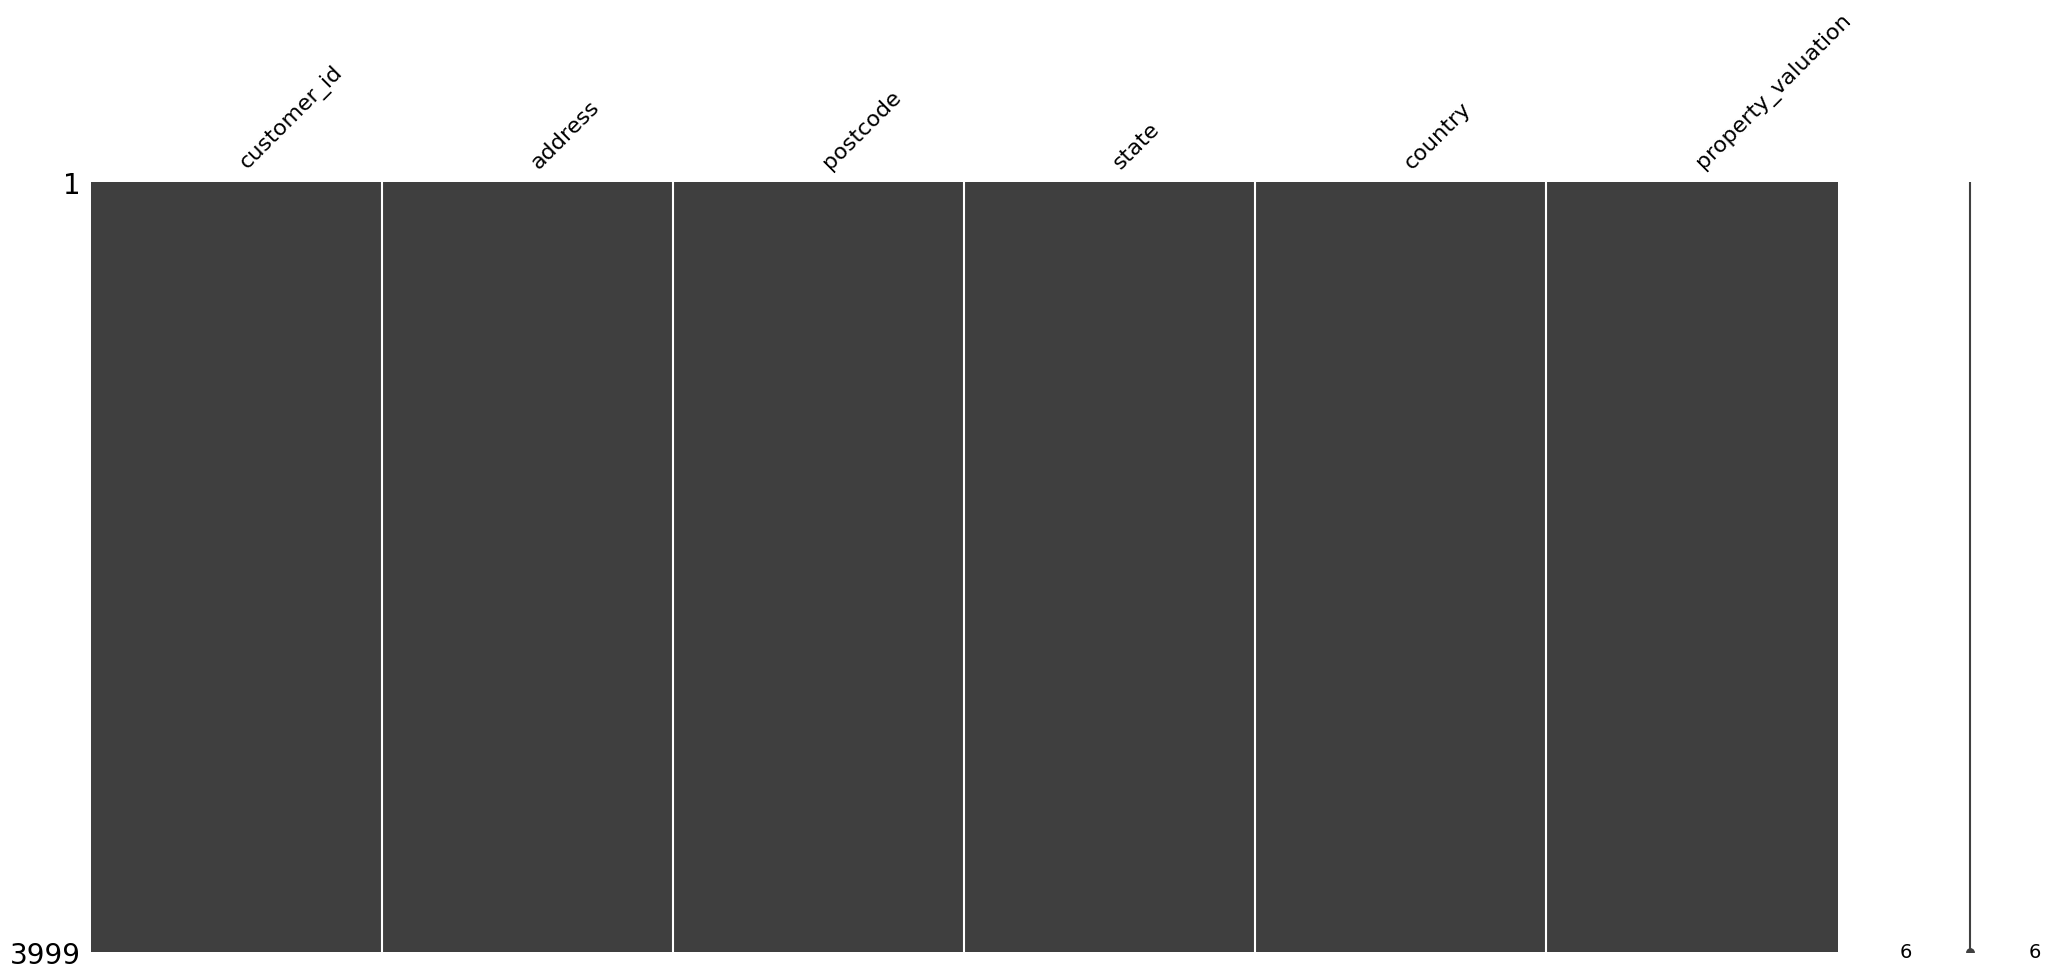

In [ ]:
import missingno as msno
msno.matrix(rfm_add)
plt.show()

In [ ]:
rfm_add.duplicated().sum()

0

In [ ]:
rfm_add['address'].value_counts()

,count
address,
3 Mariners Cove Terrace,2
3 Talisman Place,2
64 Macpherson Junction,2
359 Briar Crest Road,1
4543 Service Terrace,1
...,...
5063 Shopko Pass,1
09 Hagan Pass,1
87897 Lighthouse Bay Pass,1


In [ ]:
rfm_add[['no_street', 'street']] = rfm_add['address'].str.split(' ', n=1, expand=True)
rfm_add.drop('address', axis=1, inplace=True)
rfm_add

,customer_id,postcode,state,country,property_valuation,no_street,street
0,1,2016,New South Wales,Australia,10,060,Morning Avenue
1,2,2153,New South Wales,Australia,10,6,Meadow Vale Court
2,4,4211,QLD,Australia,9,0,Holy Cross Court
3,5,2448,New South Wales,Australia,4,17979,Del Mar Point
4,6,3216,VIC,Australia,9,9,Oakridge Court
...,...,...,...,...,...,...,...
3994,3999,3064,VIC,Australia,3,1482,Hauk Trail
3995,4000,4511,QLD,Australia,6,57042,Village Green Point
3996,4001,2756,NSW,Australia,10,87,Crescent Oaks Alley
3997,4002,4032,QLD,Australia,7,8194,Lien Street


In [ ]:
rfm_add['street'].str.lower().value_counts()

,count
street,
hayes court,4
roth pass,4
monterey street,4
alpine lane,4
sundown trail,4
...,...
harbort terrace,1
scott lane,1
schlimgen alley,1


In [ ]:
rfm_add.drop(['no_street', 'street', 'country'], axis=1, inplace=True)

In [ ]:
rfm_add['postcode'].value_counts()

,count
postcode,
2170,31
2155,30
2145,30
2153,29
3977,26
...,...
3808,1
3114,1
4721,1


In [ ]:
rfm_add['property_valuation'].value_counts()

,count
property_valuation,
9,647
8,646
10,577
7,493
11,281
6,238
5,225
4,214
12,195


In [ ]:
rfm_add

,customer_id,postcode,state,property_valuation
0,1,2016,New South Wales,10
1,2,2153,New South Wales,10
2,4,4211,QLD,9
3,5,2448,New South Wales,4
4,6,3216,VIC,9
...,...,...,...,...
3994,3999,3064,VIC,3
3995,4000,4511,QLD,6
3996,4001,2756,NSW,10
3997,4002,4032,QLD,7


In [ ]:
rfm_add['state'].value_counts()

,count
state,
NSW,2054
VIC,939
QLD,838
New South Wales,86
Victoria,82


In [ ]:
# The six states of Australia are1234:
# New South Wales --> NSA
# Victoria        --> VIC
# Queensland       --> QLD

# Western Australia
# South Australia
# Tasmania

In [ ]:
rfm_add['state'] = rfm_add['state'].replace(['NSW', 'VIC', 'QLD'], ['New South Wales', 'Victoria', 'Queensland'])
rfm_add['state'].value_counts()

,count
state,
New South Wales,2140
Victoria,1021
Queensland,838


In [ ]:
from google.colab import files

rfm_add.to_csv('RFM_CustomerAddress.csv', index = False)
files.download('RFM_CustomerAddress.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>